In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv ('Diabetes Health Dataset.csv') 


In [3]:
data.shape

(253680, 22)

In [4]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### **From the above output, we could infer there is no missing data.**

In [7]:
data.shape

(253680, 22)

In [8]:
data.duplicated().sum()

23899

#### **Out of 253680, 23899 rows are duplicate data.**

### **To Drop Duplicate Data**


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data_visualization=data.copy()

### Data Transformation for Visualization

In [12]:
#transform data
data_visualization.Diabetes_012[data_visualization['Diabetes_012'] == 0] = 'Non Diabetic'
data_visualization.Diabetes_012[data_visualization['Diabetes_012'] == 1] = 'Pre Diabetic'
data_visualization.Diabetes_012[data_visualization['Diabetes_012'] == 2] = 'Diabetic'

data_visualization.HighBP[data_visualization['HighBP'] == 0] = 'No High BP'
data_visualization.HighBP[data_visualization['HighBP'] == 1] = 'High BP'

data_visualization.HighChol[data_visualization['HighChol'] == 0] = 'No High Cholesterol'
data_visualization.HighChol[data_visualization['HighChol'] == 1] = 'High Cholesterol'

data_visualization.CholCheck[data_visualization['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data_visualization.CholCheck[data_visualization['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data_visualization.Smoker[data_visualization['Smoker'] == 0] = 'No'
data_visualization.Smoker[data_visualization['Smoker'] == 1] = 'Yes'

data_visualization.Stroke[data_visualization['Stroke'] == 0] = 'No'
data_visualization.Stroke[data_visualization['Stroke'] == 1] = 'Yes'

data_visualization.HeartDiseaseorAttack[data_visualization['HeartDiseaseorAttack'] == 0] = 'No'
data_visualization.HeartDiseaseorAttack[data_visualization['HeartDiseaseorAttack'] == 1] = 'Yes'

data_visualization.PhysActivity[data_visualization['PhysActivity'] == 0] = 'No'
data_visualization.PhysActivity[data_visualization['PhysActivity'] == 1] = 'Yes'

data_visualization.Fruits[data_visualization['Fruits'] == 0] = 'No'
data_visualization.Fruits[data_visualization['Fruits'] == 1] = 'Yes'

data_visualization.Veggies[data_visualization['Veggies'] == 0] = 'No'
data_visualization.Veggies[data_visualization['Veggies'] == 1] = 'Yes'

data_visualization.HvyAlcoholConsump[data_visualization['HvyAlcoholConsump'] == 0] = 'No'
data_visualization.HvyAlcoholConsump[data_visualization['HvyAlcoholConsump'] == 1] = 'Yes'

data_visualization.AnyHealthcare[data_visualization['AnyHealthcare'] == 0] = 'No'
data_visualization.AnyHealthcare[data_visualization['AnyHealthcare'] == 1] = 'Yes'

data_visualization.NoDocbcCost[data_visualization['NoDocbcCost'] == 0] = 'No'
data_visualization.NoDocbcCost[data_visualization['NoDocbcCost'] == 1] = 'Yes'

data_visualization.GenHlth[data_visualization['GenHlth'] == 1] = 'Excellent'
data_visualization.GenHlth[data_visualization['GenHlth'] == 2] = 'Very Good'
data_visualization.GenHlth[data_visualization['GenHlth'] == 3] = 'Good'
data_visualization.GenHlth[data_visualization['GenHlth'] == 4] = 'OK'
data_visualization.GenHlth[data_visualization['GenHlth'] == 5] = 'Poor'

data_visualization.DiffWalk[data_visualization['DiffWalk'] == 0] = 'No'
data_visualization.DiffWalk[data_visualization['DiffWalk'] == 1] = 'Yes'

data_visualization.Sex[data_visualization['Sex'] == 0] = 'Female'
data_visualization.Sex[data_visualization['Sex'] == 1] = 'Male'

data_visualization.Education[data_visualization['Education'] == 1] = 'Never Attended School'
data_visualization.Education[data_visualization['Education'] == 2] = 'Elementary'
data_visualization.Education[data_visualization['Education'] == 3] = 'Some high school'
data_visualization.Education[data_visualization['Education'] == 4] = 'High school graduate'
data_visualization.Education[data_visualization['Education'] == 5] = 'Some college or technical school'
data_visualization.Education[data_visualization['Education'] == 6] = 'College graduate'

data_visualization.Income[data_visualization['Income'] == 1] = 'Less Than $10,000'
data_visualization.Income[data_visualization['Income'] == 2] = 'Less Than $10,000'
data_visualization.Income[data_visualization['Income'] == 3] = 'Less Than $10,000'
data_visualization.Income[data_visualization['Income'] == 4] = 'Less Than $10,000'
data_visualization.Income[data_visualization['Income'] == 5] = 'Less Than $35,000'
data_visualization.Income[data_visualization['Income'] == 6] = 'Less Than $35,000'
data_visualization.Income[data_visualization['Income'] == 7] = 'Less Than $35,000'
data_visualization.Income[data_visualization['Income'] == 8] = '$75,000 or More'

In [13]:
data_visualization.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Non Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,40.0,Yes,No,No,No,No,...,Yes,No,Poor,18.0,15.0,Yes,Female,9.0,High school graduate,"Less Than $10,000"
1,Non Diabetic,No High BP,No High Cholesterol,No Cholesterol Check in 5 Years,25.0,Yes,No,No,Yes,No,...,No,Yes,Good,0.0,0.0,No,Female,7.0,College graduate,"Less Than $10,000"
2,Non Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,28.0,No,No,No,No,Yes,...,Yes,Yes,Poor,30.0,30.0,Yes,Female,9.0,High school graduate,"$75,000 or More"
3,Non Diabetic,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,0.0,0.0,No,Female,11.0,Some high school,"Less Than $35,000"
4,Non Diabetic,High BP,High Cholesterol,Cholesterol Check in 5 Years,24.0,No,No,No,Yes,Yes,...,Yes,No,Very Good,3.0,0.0,No,Female,11.0,Some college or technical school,"Less Than $10,000"


In [14]:
unique_values = {}
for col in data_visualization.columns:
    unique_values[col] = data_visualization[col].value_counts().shape[0]

In [15]:
pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


<AxesSubplot: >

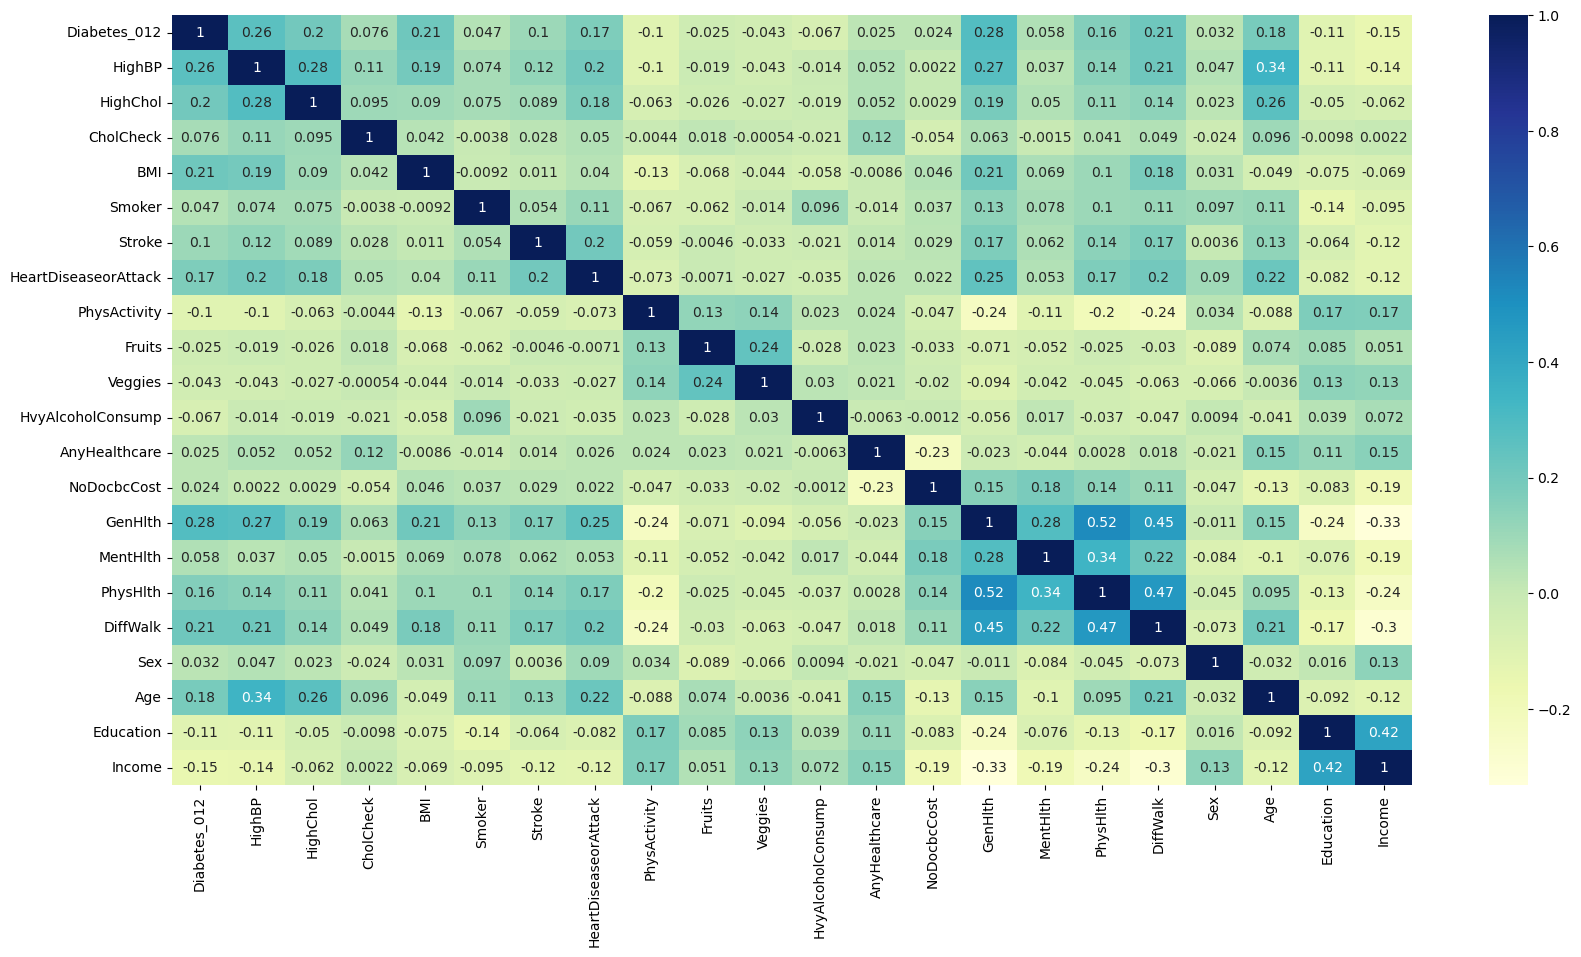

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

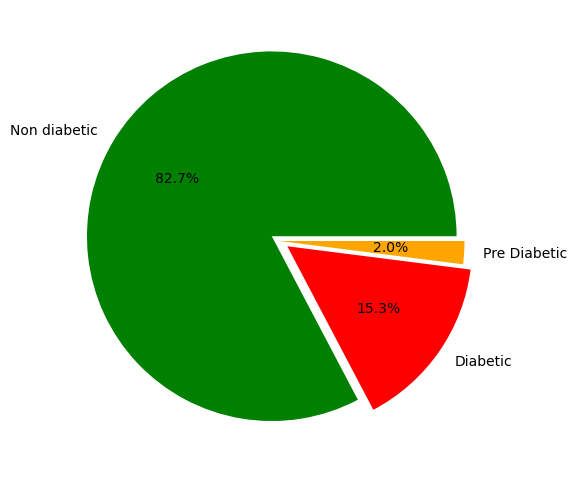

In [16]:
# Pie Chart of diabetic Patients 
plt.figure(figsize=(8,6))
labels = ['Non diabetic', 'Diabetic', 'Pre Diabetic']
sizes = [data_visualization['Diabetes_012'].value_counts()[0], data_visualization['Diabetes_012'].value_counts()[1], data_visualization['Diabetes_012'].value_counts()[2]]
colors = ['green', 'red', 'orange']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data_visualization);

## **Distibution of Diabetes based on Gender**

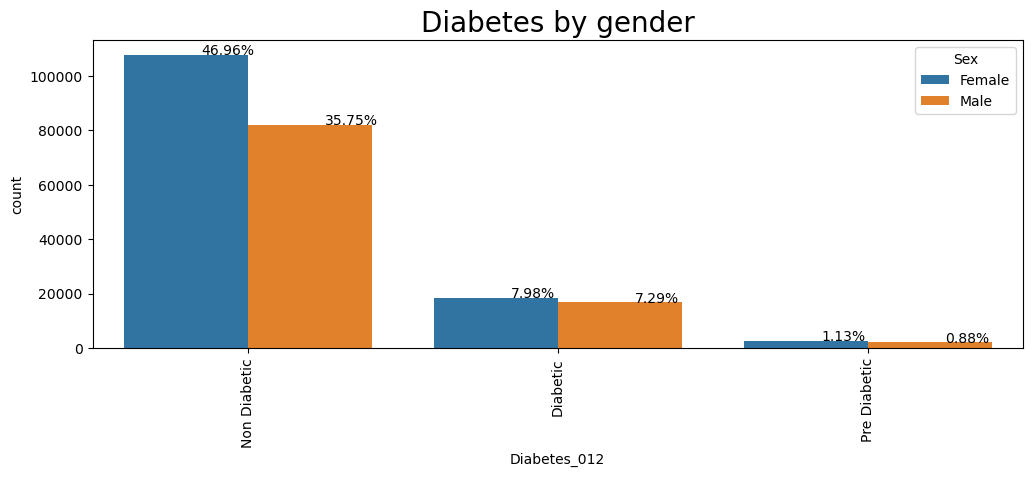

In [17]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=data_visualization,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data_visualization.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

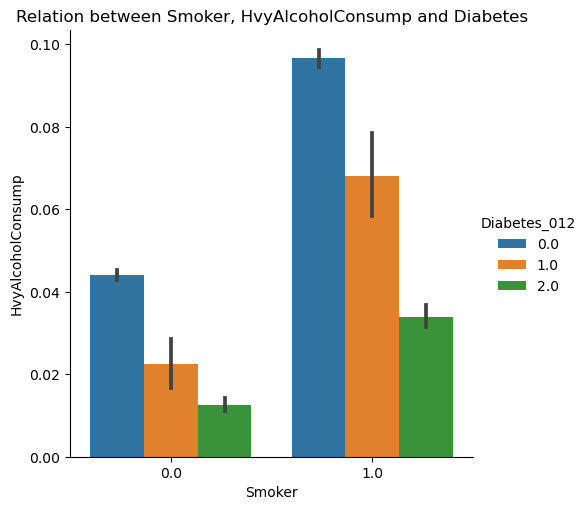

In [18]:
sns.catplot(x="Smoker", y="HvyAlcoholConsump", data=data, hue="Diabetes_012", kind="bar");
plt.title("Relation between Smoker, HvyAlcoholConsump and Diabetes")

### HIGH BP

<AxesSubplot: xlabel='Diabetes_012', ylabel='count'>

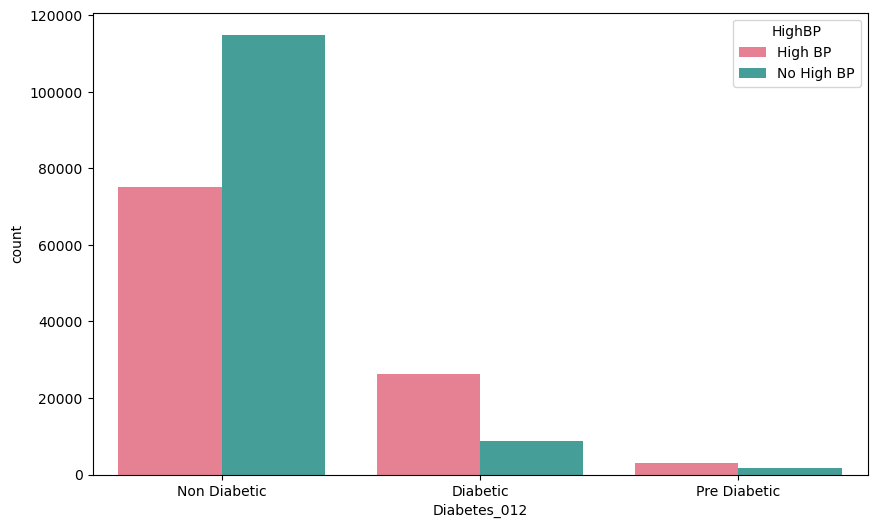

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_visualization,x='Diabetes_012',hue='HighBP',palette='husl')

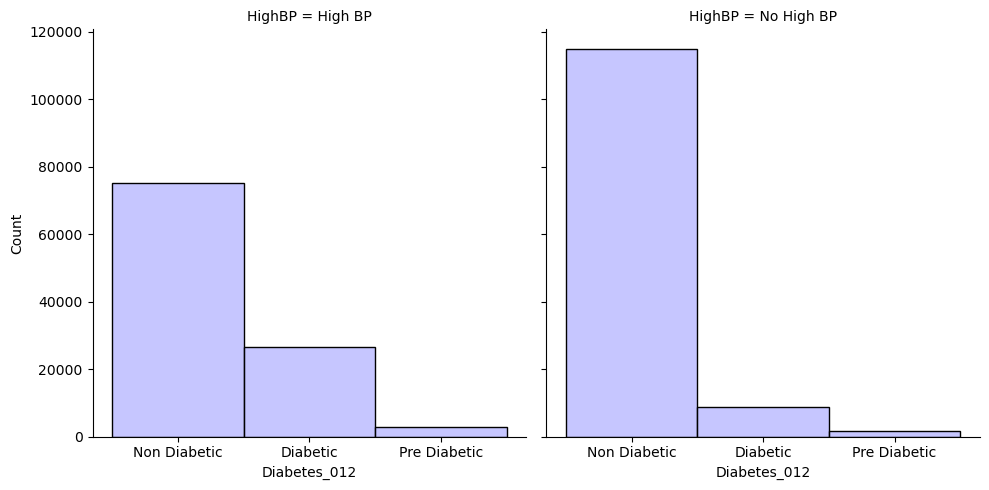

In [20]:
sns.displot(data=data_visualization,x='Diabetes_012',col='HighBP',color='#b3b3ff')

### High Cholestrol

<AxesSubplot: xlabel='Diabetes_012', ylabel='count'>

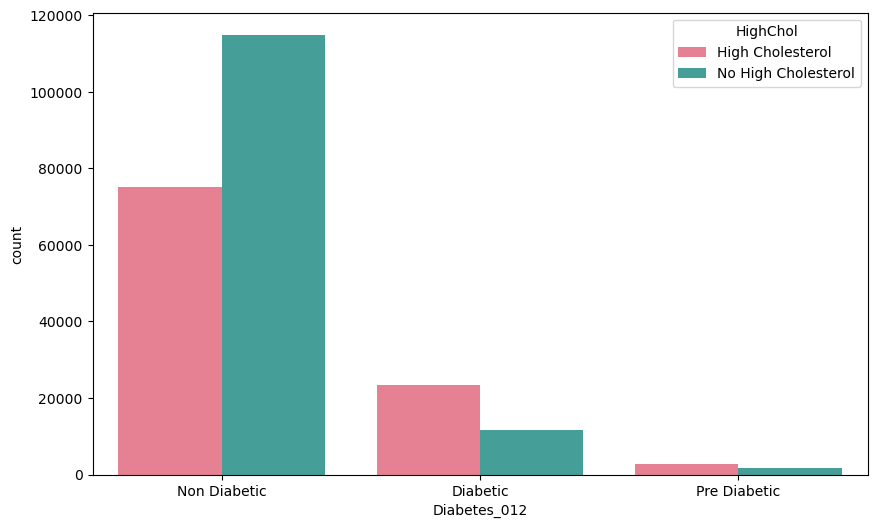

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_visualization,x='Diabetes_012',hue='HighChol',palette='husl')

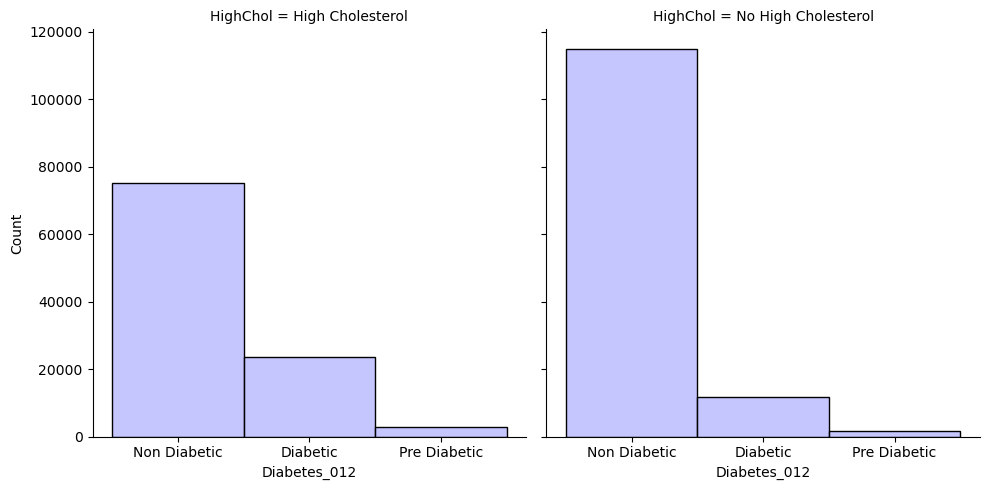

In [22]:
sns.displot(data=data_visualization,x='Diabetes_012',col='HighChol',color='#b3b3ff')

### Checking HighBP and HighChol's combined effect on Diabetes

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

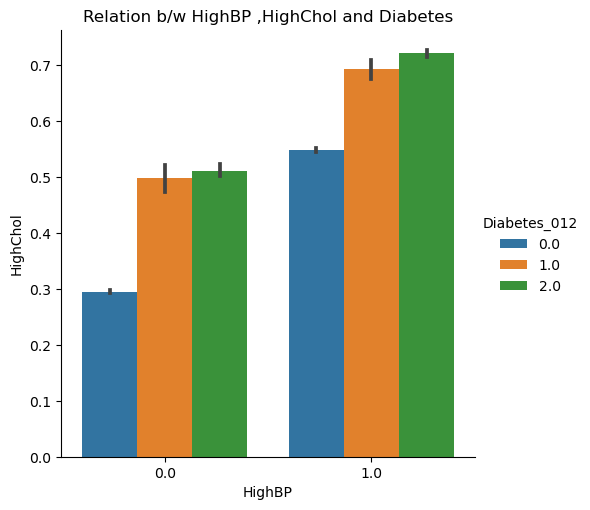

In [23]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

#### High Cholestrol and High BP increases the risk of diabetes 

### Differentiating Diabetic, Pre-Diabetic and Non-Diabetic persons based on BMI

In [24]:
BMI=pd.cut( data_visualization['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])
dd=pd.crosstab(data_visualization['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetic,169.0,5350.0,11419.0,18118.0
Non Diabetic,2856.0,67462.0,68505.0,50998.0
Pre Diabetic,28.0,924.0,1631.0,2042.0


In [25]:
Diabetes_sum_lst=list(dd.transpose().sum().values)
Diabetes_sum_lst
# convert counts to percentages
Diabetes_sum_lst = list(dd.transpose().sum().values)
for idx in range(dd.values.shape[0]):
    dd.values[idx] = dd.values[idx] / Diabetes_sum_lst[idx] * 100

dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetic,0.482086,15.261296,32.573597,51.683021
Non Diabetic,1.504575,35.539798,36.089263,26.866364
Pre Diabetic,0.605405,19.978378,35.264865,44.151351


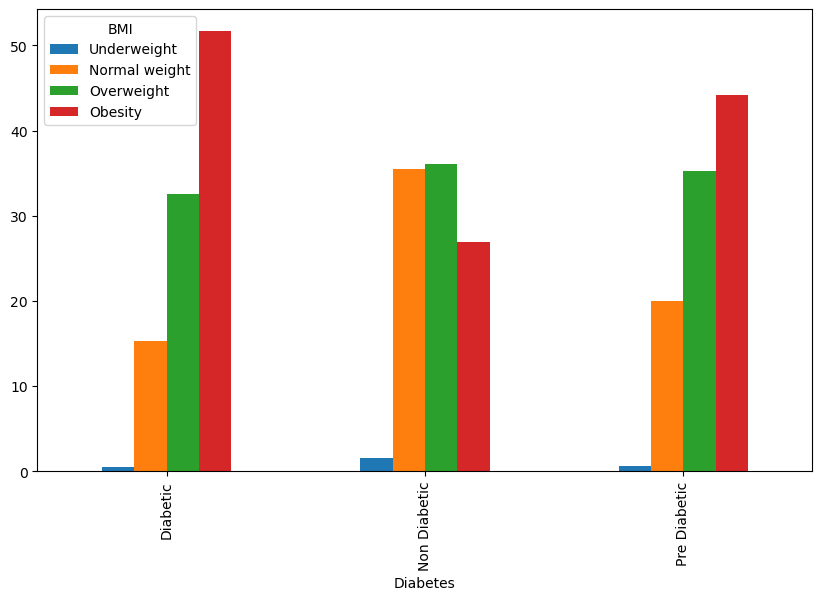

In [26]:
dd.plot(kind="bar",figsize=(10,6));

### Income

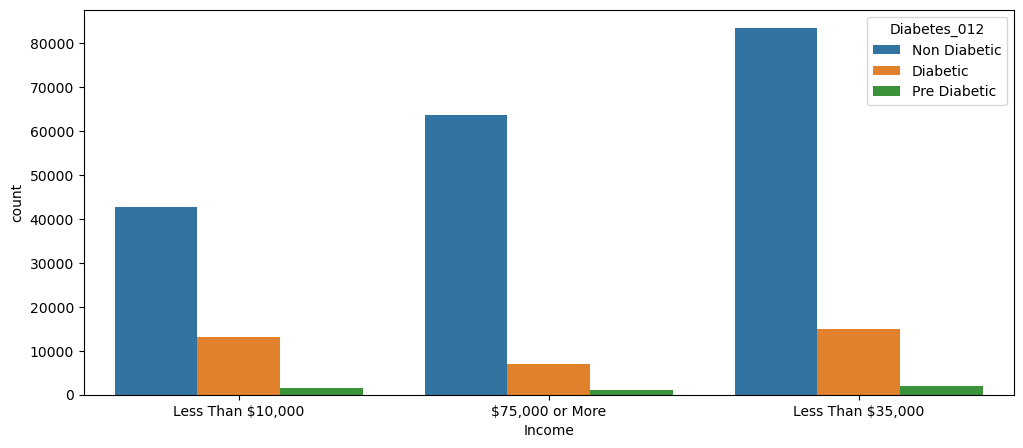

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = data_visualization)
plt.show()

### Healthcare

<Figure size 1000x600 with 0 Axes>

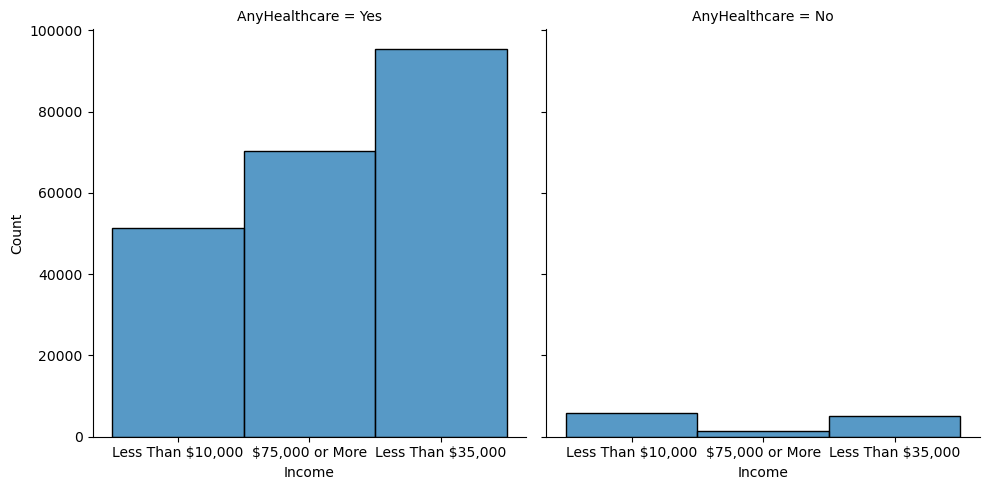

In [28]:
# The effect of the income on the healthcare
plt.figure(figsize=(10,6))
sns.displot(data=data_visualization,x='Income',col='AnyHealthcare');

### Education

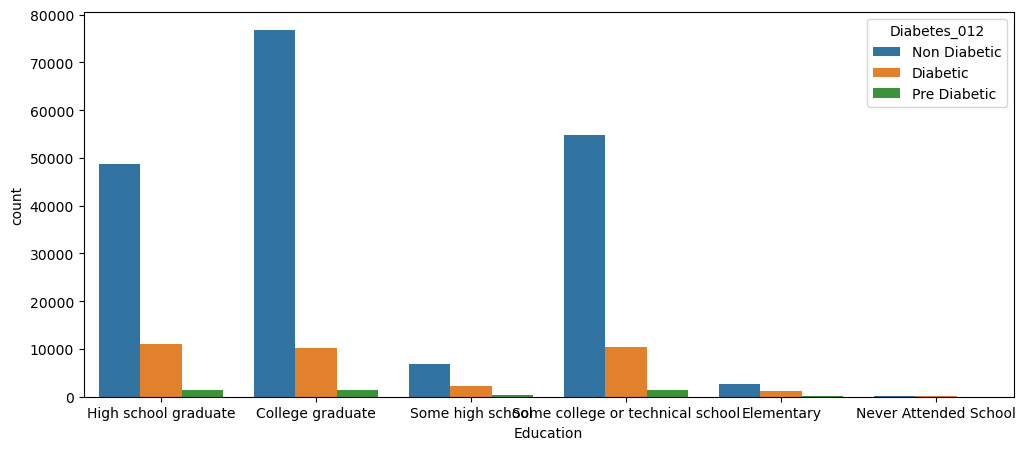

In [29]:
#effect of education
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_012' , data = data_visualization)
plt.show()

### Veggies and Fruits

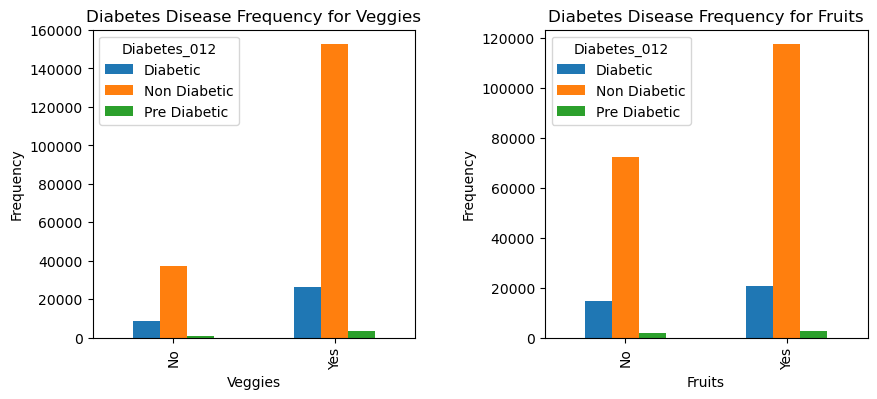

In [30]:
#impact of veggies and fruits
# load data
# create a subplot with two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# plot first chart in the first column
pd.crosstab(data_visualization.Veggies, data_visualization.Diabetes_012).plot(kind='bar', ax=axs[0])
axs[0].set_title('Diabetes Disease Frequency for Veggies')
axs[0].set_xlabel('Veggies')
axs[0].set_ylabel('Frequency')

# plot second chart in the second column
pd.crosstab(data_visualization.Fruits, data_visualization.Diabetes_012).plot(kind='bar', ax=axs[1])
axs[1].set_title('Diabetes Disease Frequency for Fruits')
axs[1].set_xlabel('Fruits')
axs[1].set_ylabel('Frequency')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# show the plot
plt.show()


### Physical Activity

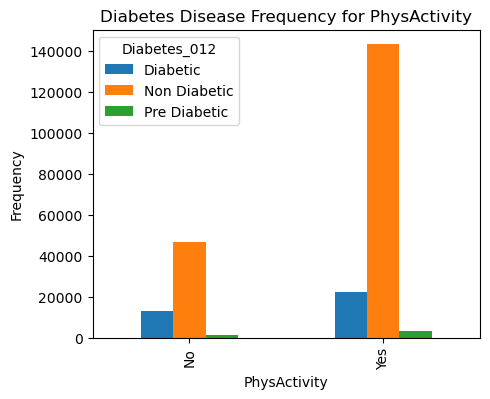

In [31]:
pd.crosstab(data_visualization.PhysActivity,data_visualization.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

## Pre-Processing

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

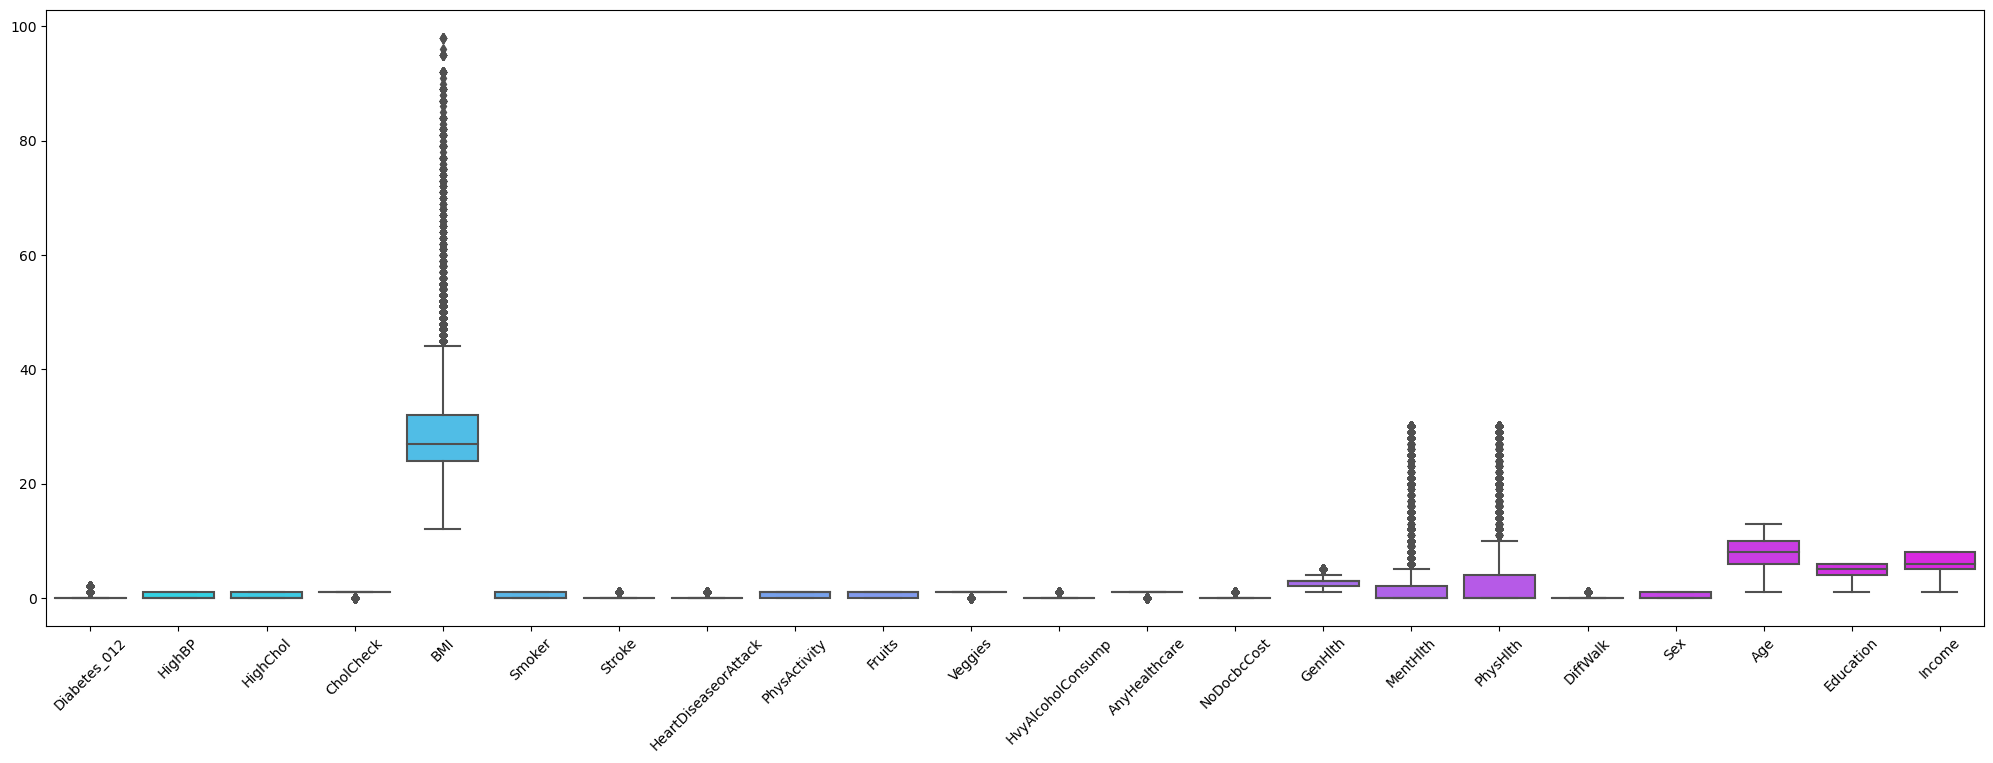

In [32]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

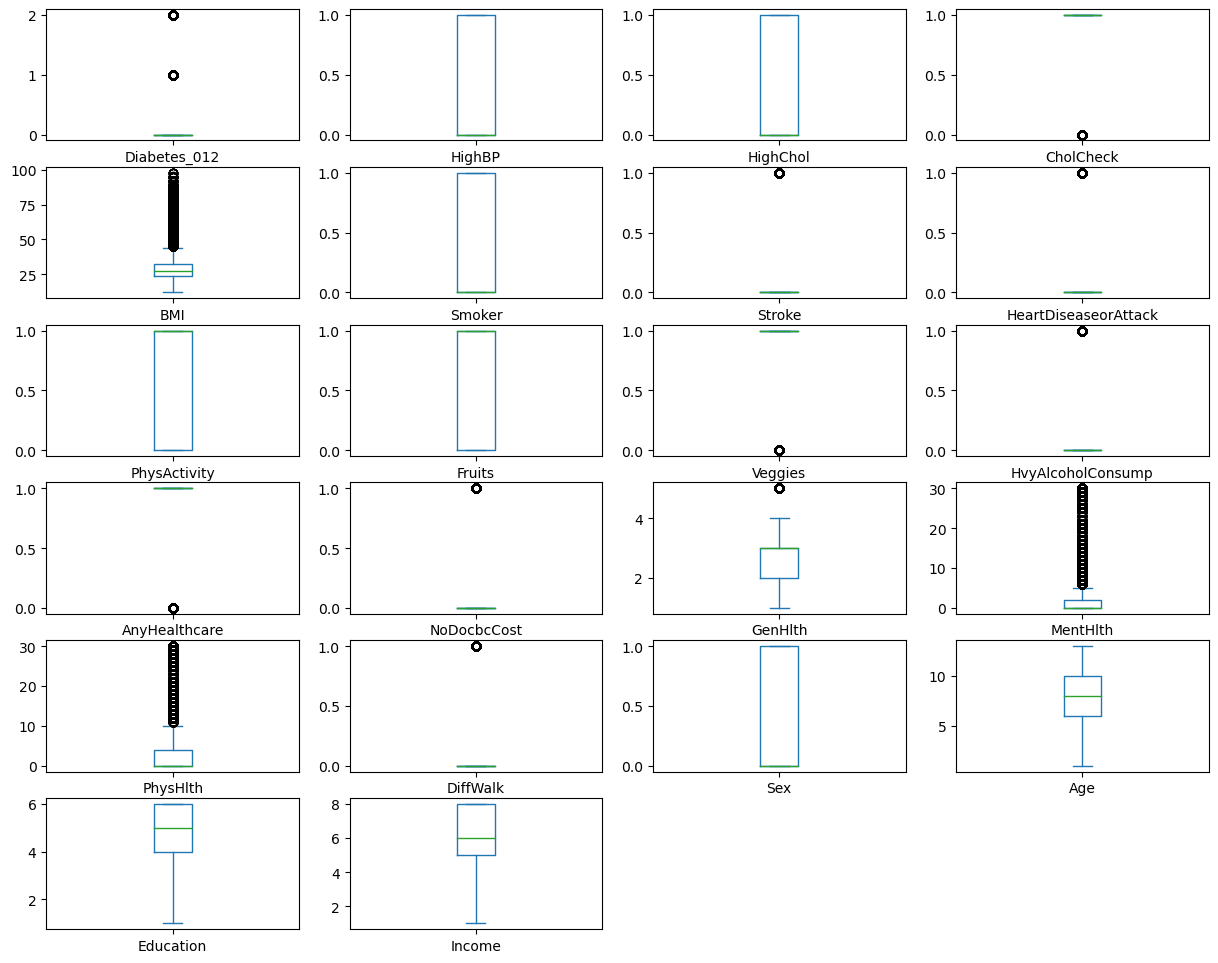

In [33]:
# Finding Outliers
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

## Handling Of the Outliers of the BMI

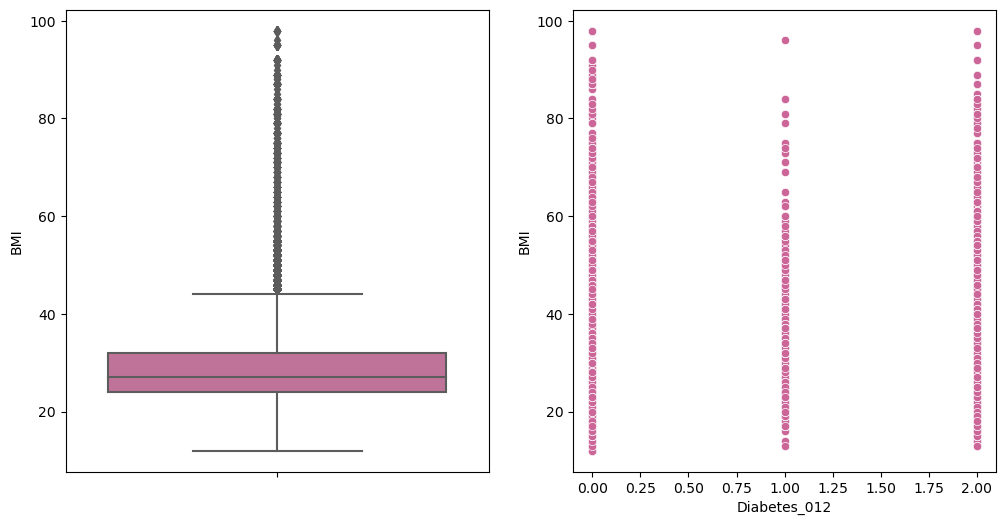

In [34]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [35]:
df=data.copy()

In [36]:
df=data[data['BMI']<70]

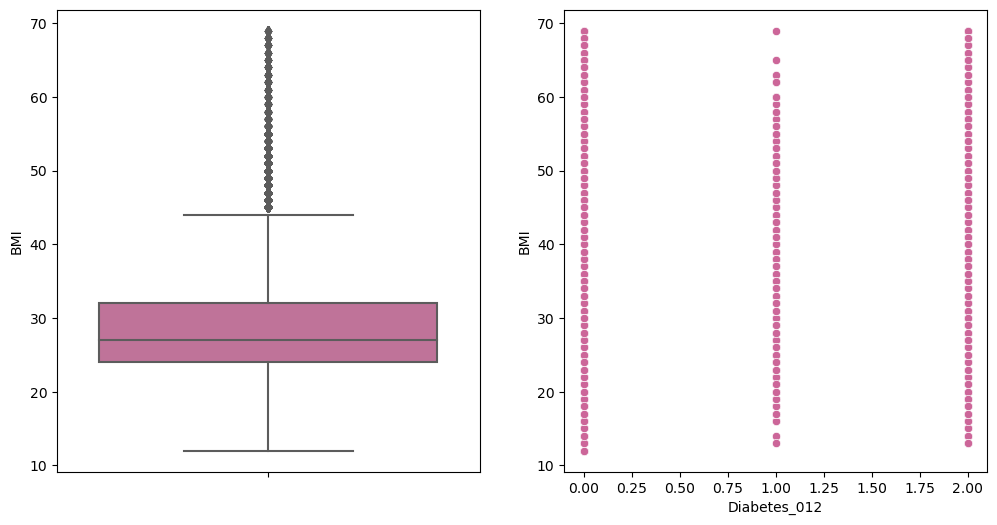

In [37]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [38]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    189549
2.0     35016
1.0      4617
Name: count, dtype: int64

In [39]:
y = df['Diabetes_012']
x = df.drop(['Diabetes_012'], axis=1)

In [40]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size= 0.25,random_state=42)

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Modeling

### Logistic Regression

In [42]:
log_reg = LogisticRegression(penalty = 'l2')

log_reg.fit(X_res, y_res)

LogisticRegression()

In [43]:
print(log_reg.score(X_res, y_res))
print(log_reg.score(X_test, y_test))

0.5088609849496839
0.6054000279251606


In [44]:
y_pred_train_lg = log_reg.predict(X_res)
acc_train_lg = accuracy_score(y_res, y_pred_train_lg)

y_pred_test_lg = log_reg.predict(X_test)
acc_test_lg = accuracy_score(y_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

0.5088609849496839
0.6054000279251606


In [79]:
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

         0.0       0.93      0.62      0.74     47315
         1.0       0.03      0.28      0.05      1125
         2.0       0.33      0.58      0.42      8856

    accuracy                           0.61     57296
   macro avg       0.43      0.49      0.41     57296
weighted avg       0.82      0.61      0.68     57296



In [73]:
y_pred_prob_lg = log_reg.predict_proba(X_test)
roc_auc_score_lg= roc_auc_score(y_test, y_pred_prob_lg, multi_class="ovr")

print('ROC AUC Score: ',roc_auc_score_lg)

ROC AUC Score:  0.7341552471283938


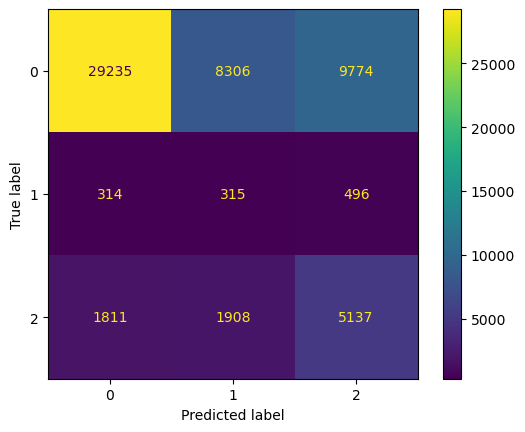

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest Classifier

In [47]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth=16,max_features=10)
rfc.fit(X_res, y_res)

RandomForestClassifier(max_depth=16, max_features=10)

In [48]:
print(rfc.score(X_res, y_res))
print(rfc.score(X_test, y_test))

0.8914605509231267
0.813651912873499


In [49]:
y_pred_train_rfc = rfc.predict(X_res)
acc_train_rfc = accuracy_score(y_res, y_pred_train_rfc)

y_pred_test_rfc = rfc.predict(X_test)
acc_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
print(acc_train_rfc)
print(acc_test_rfc)

0.8914605509231267
0.813651912873499


In [50]:
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     47315
         1.0       0.08      0.00      0.01      1125
         2.0       0.44      0.38      0.41      8856

    accuracy                           0.81     57296
   macro avg       0.46      0.43      0.44     57296
weighted avg       0.79      0.81      0.80     57296



In [51]:
y_pred_prob_rfc = rfc.predict_proba(X_test)
roc_auc_score_rfc = roc_auc_score(y_test, y_pred_prob_rfc, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rfc)

ROC AUC Score: 0.7510496103523167


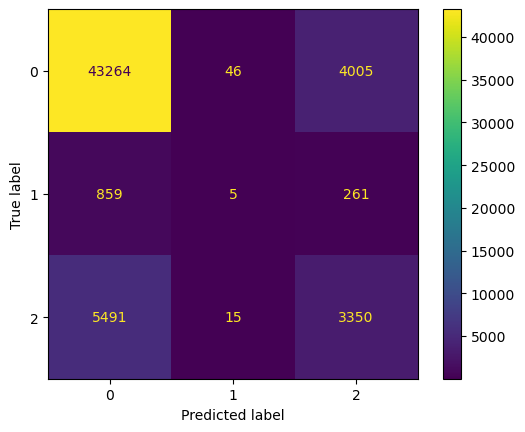

In [67]:
cm = confusion_matrix(y_test, y_pred_test_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Classifier with Cross Validation

In [68]:
rfc_crossval = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, max_features=10) 
rfc_crossval.fit(X_res, y_res)
score = cross_val_score(rfc_crossval, X_res, y_res, cv=2, scoring="accuracy")
score.mean()

0.8094571855768194

## Decision Tree Classifier 

In [53]:
from sklearn.tree import DecisionTreeClassifier

# A Basic Tree

basic_tree = DecisionTreeClassifier(criterion='entropy', random_state=43)

# Train the Model

basic_tree.fit(X_res, y_res)

# Obtain and print accuracy

print(basic_tree.score(X_test, y_test))

0.7410464953923485


In [56]:
from sklearn.model_selection import GridSearchCV

# Define Function
opt_tree = DecisionTreeClassifier(random_state = 0)

# Define all potential hyperparameters (this time, specify three different hyperparameters)

tree_params = {'max_depth': range(0,11,2),
               'min_samples_split': range(0,18,4),
               'max_leaf_nodes': range(2,11,2)}

# Define GridSearchCV

search_tree = GridSearchCV(opt_tree, tree_params,cv = 2)

# Train the model, and report accuracy

search_tree.fit(X_res, y_res)



GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(0, 11, 2),
                         'max_leaf_nodes': range(2, 11, 2),
                         'min_samples_split': range(0, 18, 4)})

In [57]:
#Report the accuracy

print(search_tree.score(X_test, y_test))

# Report the best hyperparameters chosen

print(search_tree.best_params_)

0.7805955040491482
{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 4}


In [61]:
y_pred_train_dt = search_tree.predict(X_res)
acc_train_dt = accuracy_score(y_res, y_pred_train_dt)

y_pred_test_dt = search_tree.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)

In [62]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     47315
         1.0       0.00      0.00      0.00      1125
         2.0       0.36      0.44      0.40      8856

    accuracy                           0.78     57296
   macro avg       0.41      0.43      0.42     57296
weighted avg       0.78      0.78      0.78     57296



In [63]:
y_pred_prob_dt = search_tree.predict_proba(X_test)
roc_auc_score_dt = roc_auc_score(y_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_dt)

ROC AUC Score: 0.69653104124003


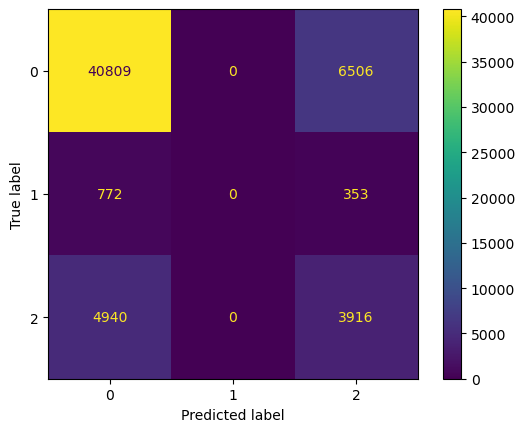

In [69]:
cm = confusion_matrix(y_test, y_pred_test_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Model Comparison

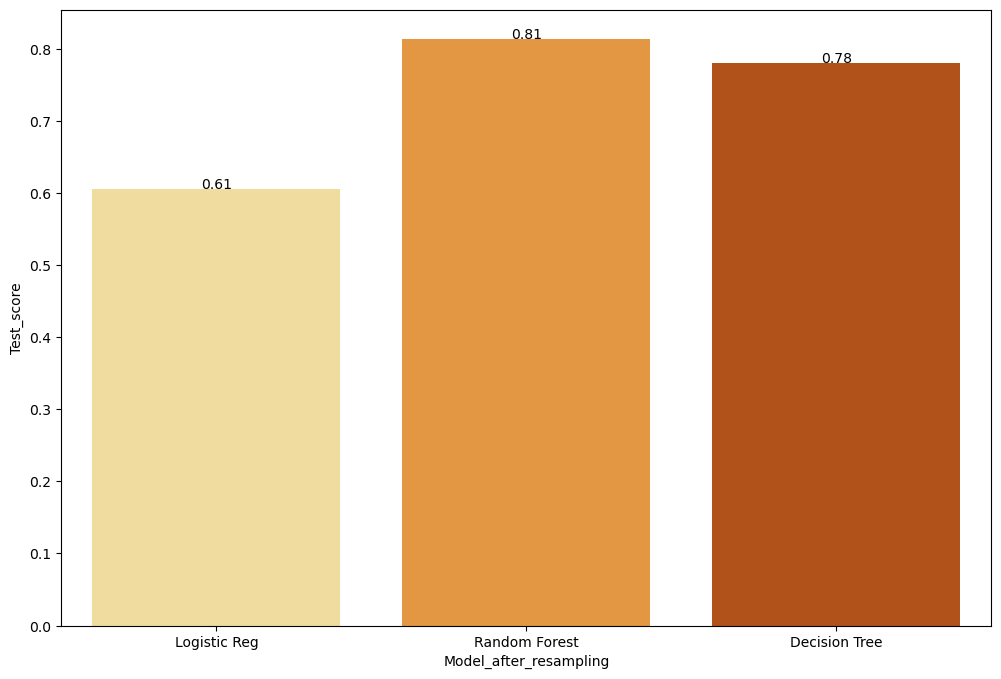

In [84]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resampling': ['Logistic Reg','Random Forest','Decision Tree'],
        'Test_score': [accuracy_score(y_test, y_pred_test_lg),
                       accuracy_score(y_test, y_pred_test_rfc),
                      accuracy_score(y_test, y_pred_test_dt)],
        
        'ROC_AUC_Score': [roc_auc_score_lg,
                          roc_auc_score_rfc, 
                         roc_auc_score_dt]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resampling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [85]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resampling,Test_score,ROC_AUC_Score
1,Random Forest,0.813652,0.751050
0,Logistic Reg,0.605400,0.734155
2,Decision Tree,0.780596,0.696531
